# Tinder para empresas

## Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy.spatial import distance
from random import choice
from beautifultable import BeautifulTable


# from translate_csv_functions import translate_csv

# from sklearn.preprocessing import MinMaxScaler
# pip3 install pandas ipython jupyter

## Preprocesado csv de las encuestas Web

Descargar como CSV cada uno de los archivos de las respuestas en la carpeta ```./encuestas``` con el nombre por defecto que proporciona google: 
```
Forms Students: 
https://docs.google.com/spreadsheets/d/1tESGSKhoOWekvYnvMypd6t1eFXN_av8F60wyxPkbUb8/edit#gid=1960323408

Forms Company: 
https://docs.google.com/spreadsheets/d/1AHnY6-E9w__BNcWqiS2rkqYbNlmqaU6nPFiPHDDKRfI/edit#gid=730113545

Encuestas Students: 
https://docs.google.com/forms/d/1w85z6lqZdQfByTMiefqUcth16-F9NnLHuZuh9CVHxyU/edit#responses

Encuestas Company: 
https://docs.google.com/forms/d/1JOjjmV1W-ay7h00wVtpcQzD6FHNJU8Qg6RRz1ptDN4Q/edit
```
## Actual BNC web
```
Students (tab 11APR): https://docs.google.com/spreadsheets/d/128bKUO5In9JPMMs9JTLAhL-KxnmhiB3L2qSdyGKdxnY/edit#gid=1970037490

Companies (tab 11APR): https://docs.google.com/spreadsheets/d/1r6zryUQRl3X_4sbcfzpUrNIuT8lBAxVC7Ov7tItmfhc/edit#gid=1943728679
```
## MAdrid web
```
https://docs.google.com/spreadsheets/d/1bk_R2l83sWOd8VQyQV3R_n2Ikzx69QrMpfyvg6PpYms/edit?ts=5cb6d4ad#gid=177161654
```

### 1. Companies

In [2]:
# Funciones translate CSV

DIC_COMPANIES = {
    "What is the name of your company?": "name", 
    'Does your company have specific language requirements for this position? [English]': 'english', 
    'Does your company have specific language requirements for this position? [Spanish]': 'spanish', 
    'Does your company have specific language requirements for this position? [Portuguese]': 'portuguese', 
    'Does your company have specific language requirements for this position? [French]': 'french', 
    'Does your company have specific language requirements for this position? [Dutch]': 'dutch', 
    'Does your company have specific language requirements for this position? [Catalan]': 'catalan', 
    'Where will this position be located?': 'location', 
    'Regarding remote working, how many days a week could the employee work off site?': 'offsite', 
    'On a scale from 1 to 10, how much time will the employee be spending working on back end and front end?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Vue]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Docker / Kubernetes]': 'dockerkubernetes',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Design Tools (Photoshop, Illustrator...)]': 'design', 
    'From this list, please rank these 3 soft skills in order of importance for this position [Motivation and ability to overcome problems: employee has a passionate, can-do attitude and proactively looks for solutions to every problem they encounter]': 'motivation',
    'From this list, please rank these 3 soft skills in order of importance for this position [Coachability: Employee is receptive and actively listens and acts on feedback received]': 'coachability',
    'From this list, please rank these 3 soft skills in order of importance for this position [Teamwork: Employee is able to receive and provide value in a team environment]': 'teamwork' # El \r del final es para que sirva de terminador
    }

LANGUAGES = ['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan']

HARDSKILLS = ['java', 'caspnet', 'python', 'php', 'sql', 'angular', 
              'vue', 'firebase', 'aws', 'dockerkubernetes', 'design']

def translate_language(x): 
    DIC_RESP_LANGUAGE = {
        # Company
        "No need": 1, 
        "Must be able to read basic documentation": 2, 
        "Must be able to read documentation and have an informal conversation": 3, 
        "Must be able to read documentation and communicate in a meeting": 4, 
        "Can work in full capacity in this language": 5, 
        # Students same
        "No Experience": 1, 
        "I'm able to read basic documentation": 2, 
        "I'm able to read documentation and have an informal conversation": 3, 
        "Able to read documentation and communicate in a meeting": 4, 
        "Can work in full capacity in this language": 5
    }
    # return 0 if x not in DIC_RESP_LANGUAGE.keys() else DIC_RESP_LANGUAGE[x] 
    return DIC_RESP_LANGUAGE.get(x, 0) # 0 default

def translate_location(x): 
    DIC_RESP_LOCATION = {
        # Company
        "In the city where the campus is located": 1, 
        "In the country where the campus is located": 2, 
        "In a city in another country": 3, 
        # Student
        "In the city where the campus is located": 1, 
        "Anywhere in the country where the campus is located": 2, 
        "Anywhere in the world": 3
    }
    # return 0 if x not in DIC_RESP_LOCATION.keys() else DIC_RESP_LOCATION[x] 
    return DIC_RESP_LOCATION.get(x, 0) # 0 default


def translate_offsite(x): 
    DIC_RESP_OFFSITE = {
        # Company
        "100% office-based job. We're not keen on remote working.": 1, 
        "1-2 Days a week": 2, 
        "3+ Days. It's up to the employee": 3, 
        "100% remote-based job. No physical office.": 4, 
        # Student
        "100% office-based job.": 1, 
        "1-2 Days a week": 2, 
        "3+ Days": 3, 
        "100% remote-based job. No physical office.": 4
    }
    # return 0 if x not in DIC_RESP_OFFSITE.keys() else DIC_RESP_OFFSITE[x] 
    return DIC_RESP_OFFSITE.get(x, 0) # 0 default

def translate_position(x): 
    try: 
        return int(x)
    except: 
        return 0

def translate_hardskills(x): 
    DIC_RESP_HARDSKILLS = {
        # Company
        "No Need": 1, 
        "Nice to have: They should have a basic knowledge": 2, 
        "Must have: Must be able to work with the technology on a regular basis": 3,   
        # Student
        "No Experience": 1, 
        "Basic Knowledge: I've played around with it": 2, 
        "Advanced Knowledge: I'm comfortable working with it": 3
    }
    # return 0 if x not in DIC_RESP_HARDSKILLS.keys() else DIC_RESP_HARDSKILLS[x] 
    return DIC_RESP_HARDSKILLS.get(x, 0) # 0 default

   

def translate_csv(path, dic): 
    # open and setup columns
    # df = pd.read_csv(path, sep=',', index_col=0, lineterminator='\n') # para cuando tiene timestamp
    df = pd.read_csv(path, sep=',', lineterminator='\n')
    # display(df.head())
    df.rename(index=str, columns=dic, inplace=True)
    print(df.columns)
    df.index = df.name
    df.drop(columns=['name'], axis=1, inplace=True)
    
    print(df.columns)
    
    # languages
    for language in LANGUAGES: 
        df[language] = df[language].apply(translate_language)
    
    # location
    df['location'] = df['location'].apply(translate_location)    
    
    # offsite
    df['offsite'] = df['offsite'].apply(translate_offsite)
    
    # position
    df['position'] = df['position'].apply(translate_position)
    
    # hardskills
    for hardskill in HARDSKILLS: 
        df[hardskill] = df[hardskill].apply(translate_hardskills)
    
    return df

In [3]:
# COMPANIES_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Company Form (Responses) - Form Responses 1.csv'

# BNC web-day1
# COMPANIES_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Company Form (Responses) - 11APRWEB.csv'

# BNC web-day2
# COMPANIES_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Company Form (Responses) - 12APRWEB.csv'

# Madrid WEB company
COMPANIES_ENCUESTAS_CSV = './encuestas/HIRING FAIR APR 2019 MATCHMAKING - WD COMPANIES.csv'

companies_enc = translate_csv(path=COMPANIES_ENCUESTAS_CSV, dic=DIC_COMPANIES)
display(companies_enc.head(5))
# display(companies_enc.dtypes)
COMPANIES_CLEAN_CSV = './encuestas/companies.csv'
companies_enc.to_csv(COMPANIES_CLEAN_CSV, index=True)

# companies_enc.columns

Index(['name', 'english', 'spanish', 'portuguese', 'french', 'dutch',
       'catalan', 'location', 'offsite', 'position', 'java', 'caspnet',
       'python', 'php', 'sql', 'angular', 'vue', 'firebase', 'aws',
       'dockerkubernetes', 'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')
Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
VT-LAB,4,5,1,1,1,1,1,1,7,2,...,2,2,1,1,1,2,1,3,2,1
Influencity,4,5,1,1,1,1,1,2,5,1,...,1,1,1,1,2,1,1,2,1,3
NEORIS,2,5,1,1,1,1,1,2,5,1,...,1,2,2,1,1,1,1,1,3,2
BICG,3,4,1,1,1,1,1,2,4,1,...,3,2,3,3,2,2,2,2,3,1
ADIDEA,3,5,1,1,1,1,1,1,1,3,...,1,2,1,2,2,2,1,1,3,2


In [4]:
# list(companies_enc.loc['Company ALL MAX']), list(companies_enc.loc['Company ALL MIN'])

In [5]:
# STUDENTS_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Student Form (Responses) - Form Responses 1.csv'
# BNC web students day1
# STUDENTS_ENCUESTAS_CSV = './encuestas/BCN - Web Abril - Ironhack Matchmaking Student Form (Responses) - 11APR.csv'

# BNC web students day2
# STUDENTS_ENCUESTAS_CSV = './encuestas/BCN - Web Abril - Ironhack Matchmaking Student Form (Responses) - Form Responses 1.csv'

# Madrid web students
STUDENTS_ENCUESTAS_CSV = './encuestas/HIRING FAIR APR 2019 MATCHMAKING - STUDENTS WD HF APR 2019.csv'

DIC_STUDENTS = {
    "What is your full name?": "name", 
    'What is your level in the following languages? [English]': 'english', 
    'What is your level in the following languages? [Spanish]': 'spanish', 
    'What is your level in the following languages? [Portuguese]': 'portuguese', 
    'What is your level in the following languages? [French]': 'french', 
    'What is your level in the following languages? [Dutch]': 'dutch', 
    'What is your level in the following languages? [Catalan]': 'catalan', 
    'What are your preferences for job location?': 'location', 
    'What is your preference in terms of remote working?': 'offsite', 
    'In you role, how would you prefer to allocate your time between working on backend and working on frontend?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [VueJS]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Docker / Kubernetes]': 'dockerkubernetes',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Design Tools (Photoshop, Illustrator...)]': 'design', # esta es nueva
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Motivation and ability to overcome problems: I am passionate, have a can-do attitude and proactively look for solutions to every problem.]": 'motivation',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Coachability: I am receptive and actively listen and act on the feedback I receive]": 'coachability',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Teamwork: I'm able to receive and provide value in a team environment]\r": 'teamwork' # El \r del final es para que sirva de terminador
    }

students_enc = translate_csv(path=STUDENTS_ENCUESTAS_CSV, dic=DIC_STUDENTS)

Index(['name', 'english', 'spanish', 'portuguese', 'french', 'dutch',
       'catalan', 'location', 'offsite', 'position', 'java', 'caspnet',
       'python', 'php', 'sql', 'angular', 'vue', 'firebase', 'aws',
       'dockerkubernetes', 'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')
Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')


In [6]:
# students_enc.drop(columns=['todrop'], axis=1, inplace=True)
display(students_enc.head(5))
# display(students_enc.dtypes)
STUDENTS_CLEAN_CSV = './encuestas/students.csv'
students_enc.to_csv(STUDENTS_CLEAN_CSV, index=True)

# students_enc.columns

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Maria Cristina Blanco,5,5,1,2,1,1,3,2,9,1,...,1,1,1,1,1,1,3,1.0,2.0,3.0
Eugenio Ruiz Cepeda,2,5,1,1,1,1,1,2,5,1,...,1,1,1,1,1,1,2,3.0,2.0,1.0
Moisés García Almeida,3,5,1,1,1,3,2,2,4,1,...,3,1,1,2,2,1,2,2.0,3.0,1.0
Nira Alonso Rodríguez,3,5,2,1,1,1,1,2,5,1,...,1,1,1,1,1,1,2,3.0,2.0,1.0
Nerea Aparicio,3,5,1,1,1,1,2,2,5,1,...,1,1,1,1,1,1,2,1.0,3.0,2.0


In [7]:
# list(students_enc.loc['Student ALL MAX']), list(students_enc.loc['Student ALL MIN'])

In [8]:
# Testing
companies_enc.columns == students_enc.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Tratado de los CSVs

In [9]:
# Alumnos

STUDENTS_CSV = STUDENTS_CLEAN_CSV # antes -> './input/students.csv'
COMPANIES_CSV = COMPANIES_CLEAN_CSV # antes -> './input/companies.csv'

def csv2dataframe(path): 
    return pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')

def adquisition(): 
    students = csv2dataframe(STUDENTS_CSV)
    companies = csv2dataframe(COMPANIES_CSV)
    return students, companies

students, companies = adquisition()

display(len(students.columns))

23

In [10]:
# normalizacion. Por columnas en alumnos o empresas hay un 0.0 y un 1.0

def normalize_2dfs(students, companies): 
    
    # min(s, c, 0) -> para que no de NaN
    # mins = [min(s, c, 0) for s, c in zip(students.min(), companies.min())]
    mins = [min(s, c) for s, c in zip(students.min(), companies.min())]
    students = students-mins
    companies = companies-mins
    
    # maxs = [max(s, c, 1) for s, c in zip(students.max(), companies.max())]
    maxs = [max(s, c) for s, c in zip(students.max(), companies.max())]
    students = students/maxs
    companies = companies/maxs
    
    return students, companies

students_norm, companies_norm = normalize_2dfs(students, companies)

display(students), display(companies)
display(students_norm), display(companies_norm)

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Maria Cristina Blanco,5,5,1,2,1,1,3,2,9,1,...,1,1,1,1,1,1,3,1.0,2.0,3.0
Eugenio Ruiz Cepeda,2,5,1,1,1,1,1,2,5,1,...,1,1,1,1,1,1,2,3.0,2.0,1.0
Moisés García Almeida,3,5,1,1,1,3,2,2,4,1,...,3,1,1,2,2,1,2,2.0,3.0,1.0
Nira Alonso Rodríguez,3,5,2,1,1,1,1,2,5,1,...,1,1,1,1,1,1,2,3.0,2.0,1.0
Nerea Aparicio,3,5,1,1,1,1,2,2,5,1,...,1,1,1,1,1,1,2,1.0,3.0,2.0
Francisco Leston Ramos,5,5,3,1,1,2,3,1,5,1,...,2,1,1,2,1,1,3,1.0,2.0,3.0
Sergio Ortega Gil,3,5,1,1,1,1,1,2,8,2,...,2,1,1,1,1,1,3,1.0,2.0,3.0
Mario Quiroga Cuervo,5,5,1,2,1,1,3,2,7,1,...,1,2,1,1,2,1,2,1.0,3.0,2.0
Daniel García Martínez,3,5,1,1,1,2,2,2,6,1,...,1,1,1,1,1,1,2,1.0,2.0,3.0


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
VT-LAB,4,5,1,1,1,1,1,1,7,2,...,2,2,1,1,1,2,1,3,2,1
Influencity,4,5,1,1,1,1,1,2,5,1,...,1,1,1,1,2,1,1,2,1,3
NEORIS,2,5,1,1,1,1,1,2,5,1,...,1,2,2,1,1,1,1,1,3,2
BICG,3,4,1,1,1,1,1,2,4,1,...,3,2,3,3,2,2,2,2,3,1
ADIDEA,3,5,1,1,1,1,1,1,1,3,...,1,2,1,2,2,2,1,1,3,2
Claire Joster,1,5,1,1,1,1,1,2,4,3,...,3,2,2,1,3,2,1,1,2,3
Cires21,4,4,1,1,1,1,1,2,8,1,...,2,2,3,1,1,2,2,1,3,2
Decathlon,4,5,1,1,1,1,1,2,5,1,...,2,2,2,1,2,1,1,1,3,2
Dhr Global Human Resources S. L.,3,5,1,1,1,1,1,1,5,3,...,1,2,1,1,1,2,1,2,3,1


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Maria Cristina Blanco,1.0,1.0,0.2,0.666667,0.5,0.2,1.000000,0.50,0.9,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.0,0.5,1.0
Eugenio Ruiz Cepeda,0.4,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.5,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,1.0,0.5,0.0
Moisés García Almeida,0.6,1.0,0.2,0.333333,0.5,0.6,0.666667,0.50,0.4,0.333333,...,1.000000,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.5,1.0,0.0
Nira Alonso Rodríguez,0.6,1.0,0.4,0.333333,0.5,0.2,0.333333,0.50,0.5,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,1.0,0.5,0.0
Nerea Aparicio,0.6,1.0,0.2,0.333333,0.5,0.2,0.666667,0.50,0.5,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.0,1.0,0.5
Francisco Leston Ramos,1.0,1.0,0.6,0.333333,0.5,0.4,1.000000,0.25,0.5,0.333333,...,0.666667,0.333333,0.333333,0.666667,0.333333,0.333333,1.000000,0.0,0.5,1.0
Sergio Ortega Gil,0.6,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.8,0.666667,...,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.0,0.5,1.0
Mario Quiroga Cuervo,1.0,1.0,0.2,0.666667,0.5,0.2,1.000000,0.50,0.7,0.333333,...,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.0,1.0,0.5
Daniel García Martínez,0.6,1.0,0.2,0.333333,0.5,0.4,0.666667,0.50,0.6,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.0,0.5,1.0


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
VT-LAB,0.8,1.0,0.2,0.333333,0.5,0.2,0.333333,0.25,0.7,0.666667,...,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,0.5,0.0
Influencity,0.8,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.5,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.5,0.0,1.0
NEORIS,0.4,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.5,0.333333,...,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.0,1.0,0.5
BICG,0.6,0.8,0.2,0.333333,0.5,0.2,0.333333,0.50,0.4,0.333333,...,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,0.666667,0.5,1.0,0.0
ADIDEA,0.6,1.0,0.2,0.333333,0.5,0.2,0.333333,0.25,0.1,1.000000,...,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667,0.333333,0.0,1.0,0.5
Claire Joster,0.2,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.4,1.000000,...,1.000000,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333,0.0,0.5,1.0
Cires21,0.8,0.8,0.2,0.333333,0.5,0.2,0.333333,0.50,0.8,0.333333,...,0.666667,0.666667,1.000000,0.333333,0.333333,0.666667,0.666667,0.0,1.0,0.5
Decathlon,0.8,1.0,0.2,0.333333,0.5,0.2,0.333333,0.50,0.5,0.333333,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.0,1.0,0.5
Dhr Global Human Resources S. L.,0.6,1.0,0.2,0.333333,0.5,0.2,0.333333,0.25,0.5,1.000000,...,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.5,1.0,0.0


(None, None)

In [11]:
students_norm.fillna(0, inplace=True)
companies_norm.fillna(0, inplace=True)

In [12]:
# Matching

# PESOS = (alumnos.columns)

'''
P = [2,1,1,1,3,1,1,1,1,5, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1 ,1, 1, 1]
W = {col: p for col, p in zip(students_norm.columns, P)}
'''

PESOS = {
    'english': 1,
    'spanish': 1,
    'portuguese': 1,
    'french': 1,
    'dutch': 1,
    'catalan': 1,
    'location': 1, 
    'offsite': 1,
    'position': 5, # importante
    'java': 5,     # importante las técnicas
    'caspnet': 5,
    'python': 5,
    'php': 5,
    'sql': 5,
    'angular': 5,
    'vue': 5,
    'firebase': 5,
    'aws': 5,
    'dockerkubernetes': 5,
    'design': 5,
    'motivation': 1,
    'coachability': 1,
    'teamwork': 1
}


def calc_dist(s_array, c_array, weights_val): 
    ''' 
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html
    
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
    scipy.spatial.distance.cosine
    '''
    return calc_match(distance.euclidean(s_array, c_array, weights_val))

def calc_match(distance): 
    ''' [0, 1] -> [1, 0]'''
    return 1/(1+distance)
'''
def match(student, company, weights=W): 
    return calc_dist(student, company, list(weights.values()))
'''
def match(student, company, weights=PESOS): 
    student = [min(s, c) for s, c in zip(student, company)] # añadimos para que la sobrecualificación de un estudiante no empeore el matchin
    return calc_dist(student, company, list(weights.values()))

In [13]:
# match(students_norm.loc['alumno1'], companies_norm.loc['empresa1'])


# Emparejamiento

En cada ronda se crea una pareja alumno-empresa empezando por el mejor %. Luego se pasa al siguente alumno. Si la empresa que hacía mejor match es la del caso anterior, pasa a su segundo mejor match, etc. 

En cada ronda se cambia el estudiante que elige primero, entre los que no han ido primeros

In [14]:
# !jupyter kernelspec list
# import sys
# sys.path

In [15]:
# create dataframe de tamañ0 SxC

matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)
# matching.head()

In [16]:
# matching.index, matching.columns

In [17]:
# display(students_norm.head()), display(companies_norm.head())

In [18]:
# matching.loc['alumno1', 'empresa3']

def calculate_match(matching, df1, df2): 
    # matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)
    for a in matching.index: 
        for c in matching.columns:
            matching.loc[a, c] = match(df1.loc[a], df2.loc[c], weights=PESOS)
    return matching

matching = calculate_match(matching, students_norm, companies_norm)

# matching es una matriz de elementos entre [0, 1]
# matching.min().min(), matching.max().max()

matching

name,VT-LAB,Influencity,NEORIS,BICG,ADIDEA,Claire Joster,Cires21,Decathlon,Dhr Global Human Resources S. L.,Mintyhost,...,UXSmobile,Page Personnel,Sipay Plus,Minsait,Excibit Solutions Spain,Deloitte,Flexicar,BuscoExtra,Alterna,The Phone House
name,,,,,,,,,,,,,,,,,,,,,
Maria Cristina Blanco,0.289898,0.527002,0.461538,0.231214,0.303832,0.257284,0.315789,0.345666,0.271956,0.364957,...,0.241274,0.293301,0.283920,0.233254,0.260870,0.212231,0.298935,0.379796,1.000000,0.324500
Eugenio Ruiz Cepeda,0.301644,0.432939,0.440665,0.248159,0.298176,0.246606,0.297904,0.350370,0.283283,0.354424,...,0.256827,0.298176,0.300970,0.234468,0.260683,0.220527,0.315789,0.444554,0.500000,0.352527
Moisés García Almeida,0.305163,0.489229,0.457059,0.288013,0.329552,0.300000,0.309469,0.384513,0.278423,0.419386,...,0.293301,0.328226,0.289045,0.247653,0.272094,0.266670,0.372912,0.377611,0.500000,0.386376
Nira Alonso Rodríguez,0.304034,0.441861,0.440665,0.233254,0.298935,0.246606,0.300193,0.336918,0.275485,0.355813,...,0.251166,0.288950,0.273428,0.230894,0.255633,0.217596,0.303832,0.407352,0.500000,0.353889
Nerea Aparicio,0.285878,0.488594,0.486833,0.233254,0.309017,0.254470,0.310428,0.352527,0.275485,0.375000,...,0.241274,0.297883,0.280783,0.235013,0.262815,0.211989,0.303832,0.361610,0.666667,0.324500
Francisco Leston Ramos,0.307139,0.517680,0.455965,0.263844,0.329552,0.278237,0.316786,0.362592,0.298935,0.385790,...,0.257844,0.327898,0.285624,0.247931,0.274767,0.251682,0.336272,0.359322,1.000000,0.355571
Sergio Ortega Gil,0.356359,0.520958,0.461538,0.246055,0.345666,0.309017,0.344411,0.386847,0.310211,0.419386,...,0.246606,0.329552,0.293301,0.260391,0.273334,0.235013,0.404537,0.407670,1.000000,0.407670
Mario Quiroga Cuervo,0.300000,0.585786,0.572949,0.243097,0.336471,0.283920,0.335046,0.401492,0.283920,0.436492,...,0.280869,0.321731,0.296947,0.257284,0.297883,0.227306,0.303832,0.404847,0.666667,0.324500
Daniel García Martínez,0.288368,0.520958,0.461538,0.231214,0.303832,0.257284,0.310428,0.344411,0.271956,0.364957,...,0.241274,0.293301,0.280783,0.232923,0.260391,0.211989,0.298935,0.371316,1.000000,0.324500


In [19]:
# create csv de pruebas
'''
df_pruebas = matching.copy()     
df1 = df_pruebas.iloc[:, :15].copy() # 30x15
df2 = df_pruebas.head(15).copy()     # 15x30
df3 = df_pruebas.copy()              # 30x30

df1.shape, df2.shape, df3.shape
'''
pass

# Grafos

In [20]:
import networkx as nx
import matplotlib

# https://networkx.github.io/documentation/networkx-1.10/reference/introduction.html

def create_graph(df): 
    G_res=nx.Graph()
    for a in df.index: 
        for e in df.columns: 
            G_res.add_edge(a,e,weight=df.loc[a][e])
    return G_res

def plot_bipartite_graph(G, set_X, set_Y): 
    X, Y = set_X, set_Y # df1.index, df1.columns
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    nx.draw(G, pos=pos)

    '''
def get_best_match2(G, node): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge: 
            return edge
'''    
# sort por peso DESCENCENTE

def get_best_match(G, node, used): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge and all(u not in edge for u in used): 
            # return edge
            res = edge
            break
    else: 
        # elegimos uno random??
        options = [(node1, node2, w) for node1, node2, w in list(G.edges(data=True)) if node1 not in used and node2 not in used]
        aleatorio = choice(options)
        # print(aleatorio)
        # print("No hay emparejamiento posible") 
        # print(used)
        
        # return aleatorio
        res = aleatorio
    
    node1, node2, w = res
    return node1, node2, w['weight']
        
 
    


# favoreciendo empresas. más alumnos que empresas 

In [21]:
# node1, node2, w

df_pruebas = matching.copy()

In [22]:
G = create_graph(df_pruebas) # G = create_graph(df1)
students = df_pruebas.index
companies = df_pruebas.columns

plot_bipartite_graph(G, students, companies)

node1, node2, w = get_best_match(G, 'Company ALL MIN', [])
node1, node2, w

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


('Deloitte', 'Jaime Jacobo Rodríguez del Valle', 0.24127429245212265)

In [23]:
companies

Index(['VT-LAB', 'Influencity', 'NEORIS', 'BICG', 'ADIDEA', 'Claire Joster',
       'Cires21', 'Decathlon', 'Dhr Global Human Resources S. L.', 'Mintyhost',
       'Optimissa Capital Markets', 'BMind', 'Winning Scientific Management ',
       'Sopra Steria', 'BinPar Team SL', 'UXSmobile', 'Page Personnel',
       'Sipay Plus', 'Minsait ', 'Excibit Solutions Spain', 'Deloitte',
       'Flexicar', 'BuscoExtra', 'Alterna', 'The Phone House '],
      dtype='object', name='name')

In [24]:
'''
RONDAS = 3 #10
MESAS = min(len(students), len(companies))
MESAS

rondas = []

for ronda in range(RONDAS): 
    aux = []
    used = []
    for company in companies: 
        
        node1, node2, w = get_best_match(G, company, used)
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
        used.extend([node1, node2])
        if node1 == company: 
            # used.append(node2)
            aux.append((node1, node2, w))
        else: 
            # used.append(node1)
            aux.append((node2, node1, w))
    rondas.append(aux)
    print(rondas)
    
# rondas
'''
pass

# favorecemos a los estudiantes. más alumnos que empresas

('VT-LAB', 'Thilo Sperber', 0.3028309038707599)

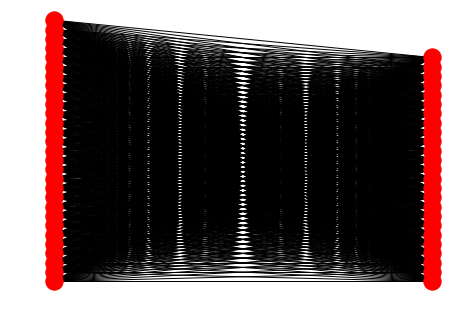

In [25]:
df_pruebas = matching.copy()     

G = create_graph(df_pruebas)
students_list = df_pruebas.index
companies_list = df_pruebas.columns

plot_bipartite_graph(G, students_list, companies_list)

node1, node2, w = get_best_match(G, 'Company ALL MID', [])
node1, node2, w

In [26]:

RONDAS = 15
# print(RONDAS)

print(len(students_list), students_list)

student_queue = list(students_list) * RONDAS # vamos a recorrer la lista para ir emparejando
# print(student_queue)

29 Index(['Maria Cristina Blanco', 'Eugenio Ruiz Cepeda', 'Moisés García Almeida',
       'Nira Alonso Rodríguez', 'Nerea Aparicio', 'Francisco Leston Ramos',
       'Sergio Ortega Gil', 'Mario Quiroga Cuervo', 'Daniel García Martínez',
       'Carlos Eduardo Lores Hernández ', 'Javier Requejo Melchor',
       'Enrique Anaya Marin', 'Maria Isabel Llanes Agudelo',
       'Daniel Herrero Hernando', 'Thilo Sperber', 'Carlos Martínez Crespo',
       'Dan Mihai Grigoriciuc', 'Rodrigo Otero Montero',
       'Verónica Celemín Lominchar', 'Abel Colmenares Napolitano',
       'Javier Pérez-Chao Rodríguez', 'Jaime Jacobo Rodríguez del Valle',
       'Patricia Defez Díaz de Sarralde', 'Isabel Rodríguez Godoy',
       'Roberto Muñoz Aragón', 'Sofia Jordan', 'Alfonso Silva Feria',
       'Alfredo Hinarejos Corbeá', 'Baltasar Torres Garcia'],
      dtype='object', name='name')


In [27]:
rondas = []

for r in range(RONDAS): 
    aux = []
    used = []
    while len(used) < 2 * len(companies): # ahora used tiene el doble de tamaño. Hay que modificarlo
        student = student_queue.pop(0)
        # print(student)
        node1, node2, w = get_best_match(G, student, used) # creo que se queda sin opciones
        
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
        used.extend([node1, node2])
        
    
        # el nodo1 es la compañía (nodo1 no es estudiante)
        if node1 != student: 
            # used.append(node1)
            aux.append((node1, node2, w))
        # nodo2 es la compañía
        else: 
            # used.append(node2)
            aux.append((node2, node1, w))
        # print(used)
    rondas.append(aux)
        
rondas

[[('Alterna', 'Maria Cristina Blanco', 1.0),
  ('BinPar Team SL', 'Eugenio Ruiz Cepeda', 0.6666666666666666),
  ('Influencity', 'Moisés García Almeida', 0.48922945434505577),
  ('NEORIS', 'Nira Alonso Rodríguez', 0.44066539250833864),
  ('Mintyhost', 'Nerea Aparicio', 0.37499999999999994),
  ('Decathlon', 'Francisco Leston Ramos', 0.36259228344434496),
  ('BuscoExtra', 'Sergio Ortega Gil', 0.4076696830622021),
  ('ADIDEA', 'Mario Quiroga Cuervo', 0.33647074420380185),
  ('The Phone House ', 'Daniel García Martínez', 0.3244997998398398),
  ('Cires21', 'Carlos Eduardo Lores Hernández ', 0.3043487450163209),
  ('Sopra Steria', 'Javier Requejo Melchor', 0.341009331522263),
  ('Page Personnel', 'Enrique Anaya Marin', 0.31578947368421056),
  ('Flexicar', 'Maria Isabel Llanes Agudelo', 0.3264808145851663),
  ('Claire Joster', 'Daniel Herrero Hernando', 0.48133650010121937),
  ('VT-LAB', 'Thilo Sperber', 0.3028309038707599),
  ('Dhr Global Human Resources S. L.',
   'Carlos Martínez Crespo',
 

In [28]:
def check_rondas(rondas): 
    res = []
    for ronda in rondas: 
        companies = [company for company, student, w in ronda]
        students = [student for company, student, w in ronda]
        res.append(len(set(companies)) == len(set(students)) )
    return all(e for e in res)
            
check_rondas(rondas)            

True

In [29]:
def rondas2string(rondas):
    res = ''
    for i, ronda in enumerate(rondas): 
        res += '\n\nRonda {}'.format(i)
        for c, s, w in ronda: 
            res += '\nCompany: {} -> Student: {} -> Matching: {}'.format(c, s, w)
        
    return res
        
        
text = rondas2string(rondas)

with open("Rondas.txt", "w") as f:
    f.write(text)

In [30]:
# beautifultable

table = BeautifulTable()
table.column_headers = ["ronda", "company", "student", "match"]
for i, ronda in enumerate(rondas): 
    for row in ronda: 
        table.append_row([i, row[0], row[1], row[2]])
        
# print(table)

with open("Rondas_table.txt", "w") as f:
    f.write(str(table))

In [31]:
# agrupadas por compañía: 

table = BeautifulTable()
table.column_headers = ["company", "ronda", "student", "match"]

for company in companies_list: 
    for i, ronda in enumerate(rondas): 
        for row in ronda: 
            if row[0] == company: 
                table.append_row([row[0], i, row[1], row[2]])
        
# print(table)

with open("Rondas_table_by_company.txt", "w") as f:
    f.write(str(table))

In [32]:
companies_list

Index(['VT-LAB', 'Influencity', 'NEORIS', 'BICG', 'ADIDEA', 'Claire Joster',
       'Cires21', 'Decathlon', 'Dhr Global Human Resources S. L.', 'Mintyhost',
       'Optimissa Capital Markets', 'BMind', 'Winning Scientific Management ',
       'Sopra Steria', 'BinPar Team SL', 'UXSmobile', 'Page Personnel',
       'Sipay Plus', 'Minsait ', 'Excibit Solutions Spain', 'Deloitte',
       'Flexicar', 'BuscoExtra', 'Alterna', 'The Phone House '],
      dtype='object', name='name')

In [33]:

table = BeautifulTable()
table.column_headers = ["student", "company", "ronda", "match"]

for student in students_list: 
    for i, ronda in enumerate(rondas): 
        for row in ronda: 
            if row[1] == student: 
                table.append_row([row[1], row[0], i, row[2]])
'''

'''    
with open("Rondas_table_by_student.txt", "w") as f:
    f.write(str(table))

In [34]:
student_rounds = {}

for student in students_list: 
    total = 0
    for ronda in rondas: 
        for row in ronda: 
            if row[1] == student: 
                total += 1
    student_rounds[student] = total

student_rounds

{'Maria Cristina Blanco': 13,
 'Eugenio Ruiz Cepeda': 13,
 'Moisés García Almeida': 13,
 'Nira Alonso Rodríguez': 13,
 'Nerea Aparicio': 13,
 'Francisco Leston Ramos': 13,
 'Sergio Ortega Gil': 13,
 'Mario Quiroga Cuervo': 13,
 'Daniel García Martínez': 13,
 'Carlos Eduardo Lores Hernández ': 13,
 'Javier Requejo Melchor': 13,
 'Enrique Anaya Marin': 13,
 'Maria Isabel Llanes Agudelo': 13,
 'Daniel Herrero Hernando': 13,
 'Thilo Sperber': 13,
 'Carlos Martínez Crespo': 13,
 'Dan Mihai Grigoriciuc': 13,
 'Rodrigo Otero Montero': 13,
 'Verónica Celemín Lominchar': 13,
 'Abel Colmenares Napolitano': 13,
 'Javier Pérez-Chao Rodríguez': 13,
 'Jaime Jacobo Rodríguez del Valle': 13,
 'Patricia Defez Díaz de Sarralde': 13,
 'Isabel Rodríguez Godoy': 13,
 'Roberto Muñoz Aragón': 13,
 'Sofia Jordan': 13,
 'Alfonso Silva Feria': 13,
 'Alfredo Hinarejos Corbeá': 12,
 'Baltasar Torres Garcia': 12}